In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [2]:
from ultralytics import YOLO
from IPython.display import Image

In [4]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="YuFq91hgXgw2QzEwFOaN")
project = rf.workspace("emotions-dectection").project("human-face-emotions")
version = project.version(30)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Human-face-emotions-30 in yolov11:: 100%|██████████| 18812/18812 [00:02<00:00, 6869.30it/s]


In [4]:
dataset.location
#/content/Human-face-emotions-30

'/content/Human-face-emotions-30'

In [5]:
!ls /content/Human-face-emotions-30/


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [6]:
!cat /content/Human-face-emotions-30/data.yaml


train: /content/Human-face-emotions-30/train/images
val: /content/Human-face-emotions-30/valid/images
test: /content/Human-face-emotions-30/test/images

nc: 8
names: ['anger', 'content', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

roboflow:
  workspace: emotions-dectection
  project: human-face-emotions
  version: 30
  license: CC BY 4.0
  url: https://universe.roboflow.com/emotions-dectection/human-face-emotions/dataset/30

In [7]:
!yolo task=detect model=train data=/content/Human-face-emotions-30/data.yaml model="yolo11n.pt" epochs=50 imgsz=1024

WARNING ⚠️ 'mode' argument is missing. Valid modes are frozenset({'val', 'train', 'export', 'predict', 'track', 'benchmark'}). Using default 'mode=train'.
100% 5.35M/5.35M [00:00<00:00, 101MB/s]
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Human-face-emotions-30/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=F

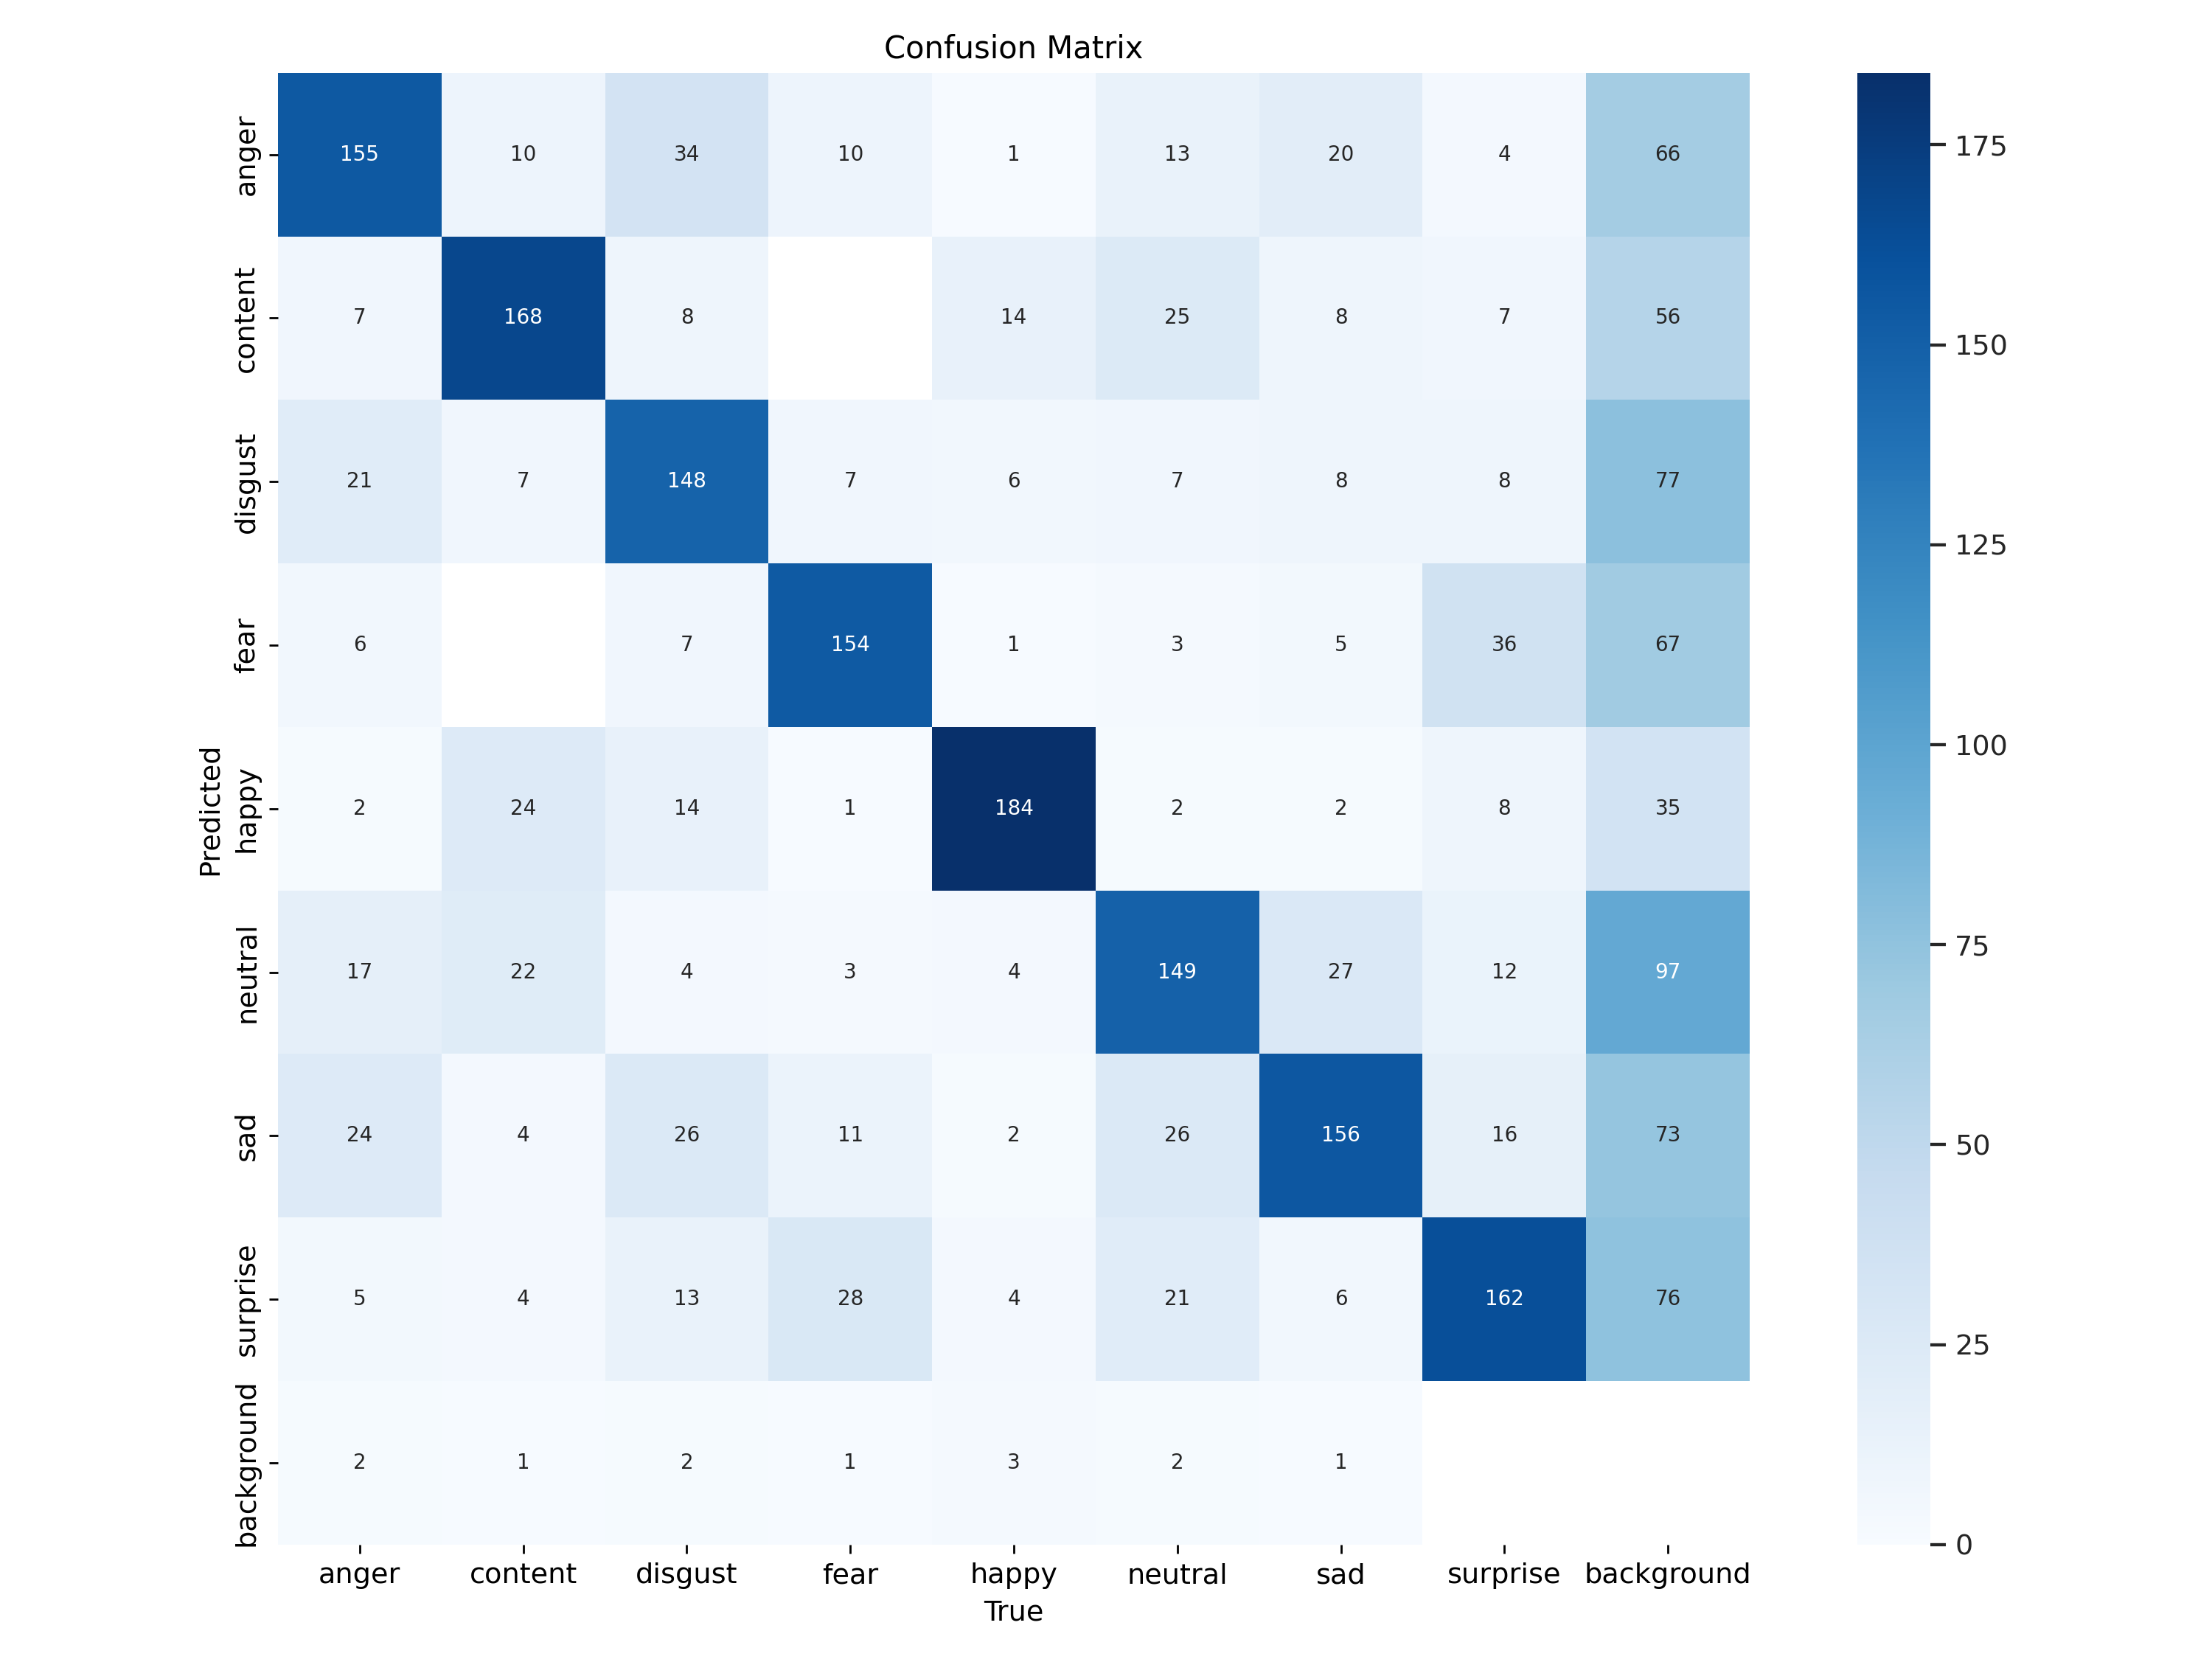

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png",width=600)

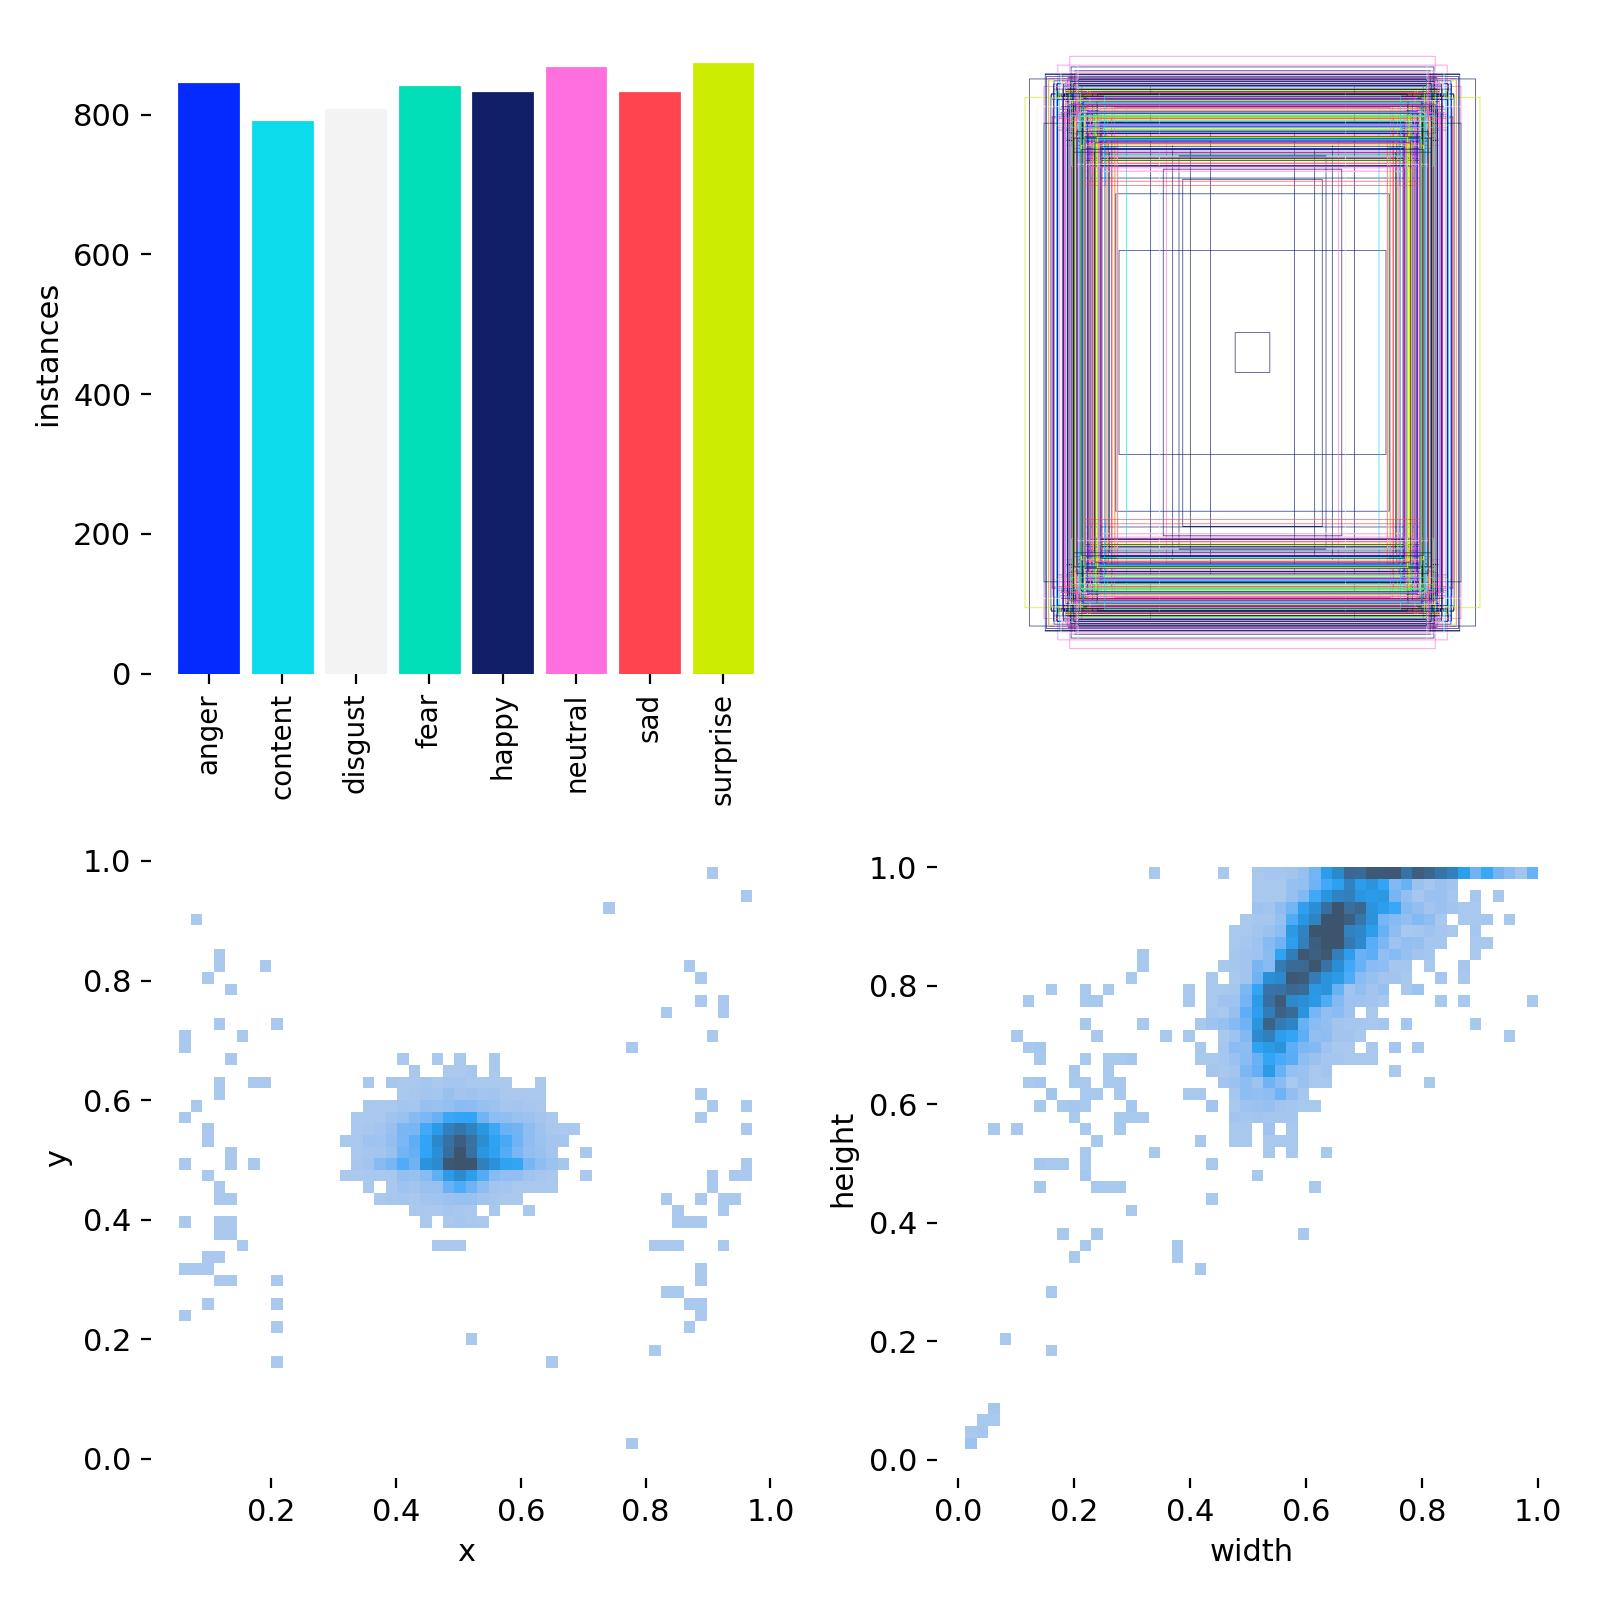

In [9]:
Image("/content/runs/detect/train/labels.jpg",width=600)

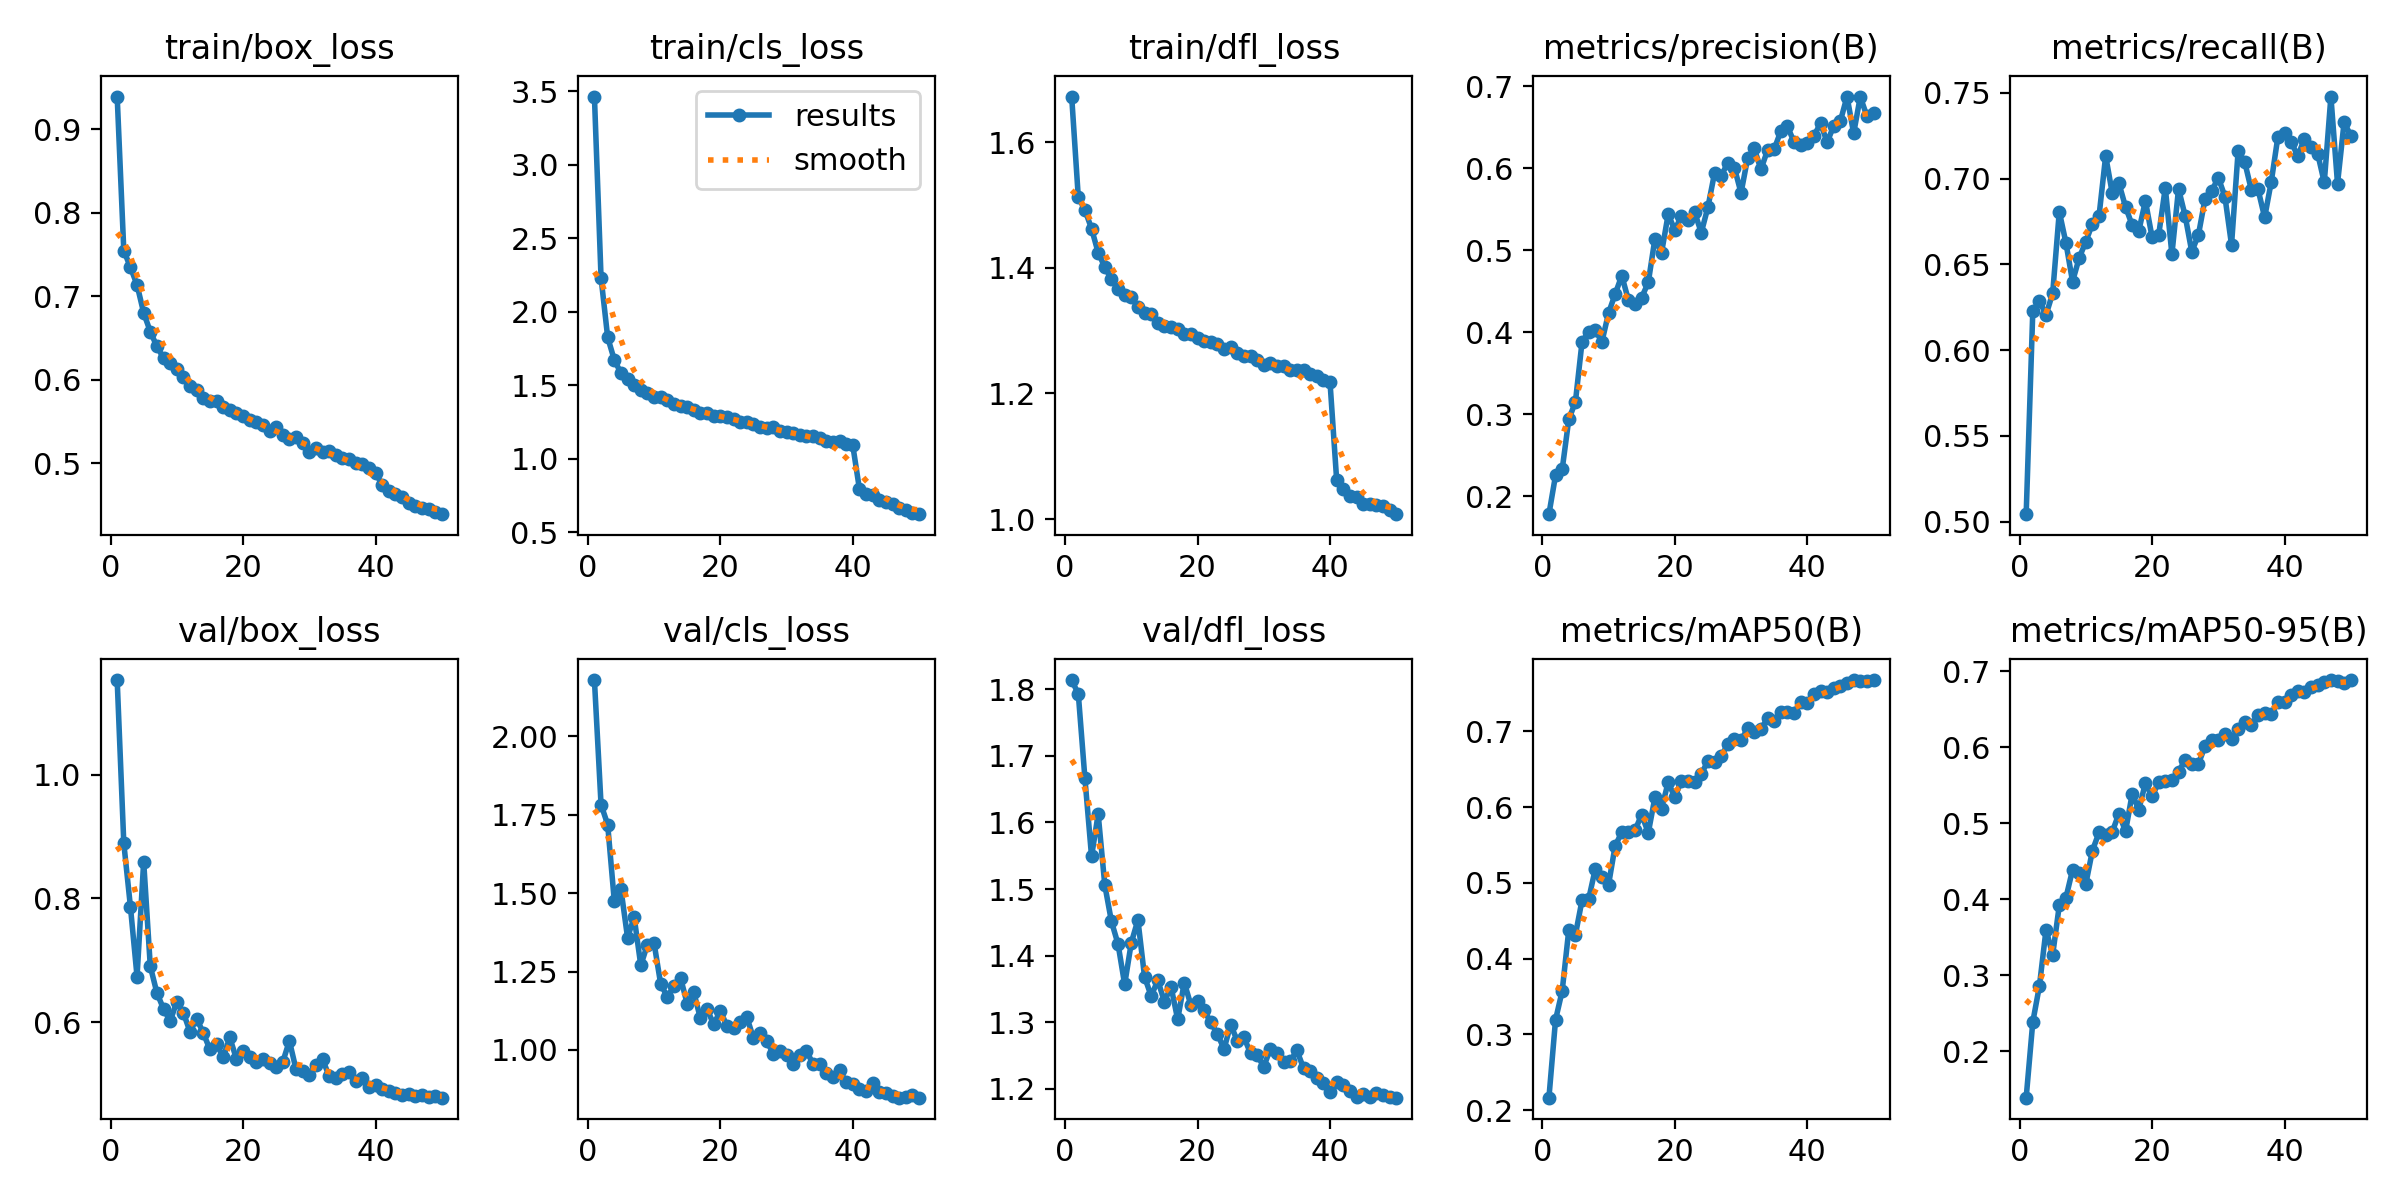

In [10]:
Image("/content/runs/detect/train/results.png",width=600)

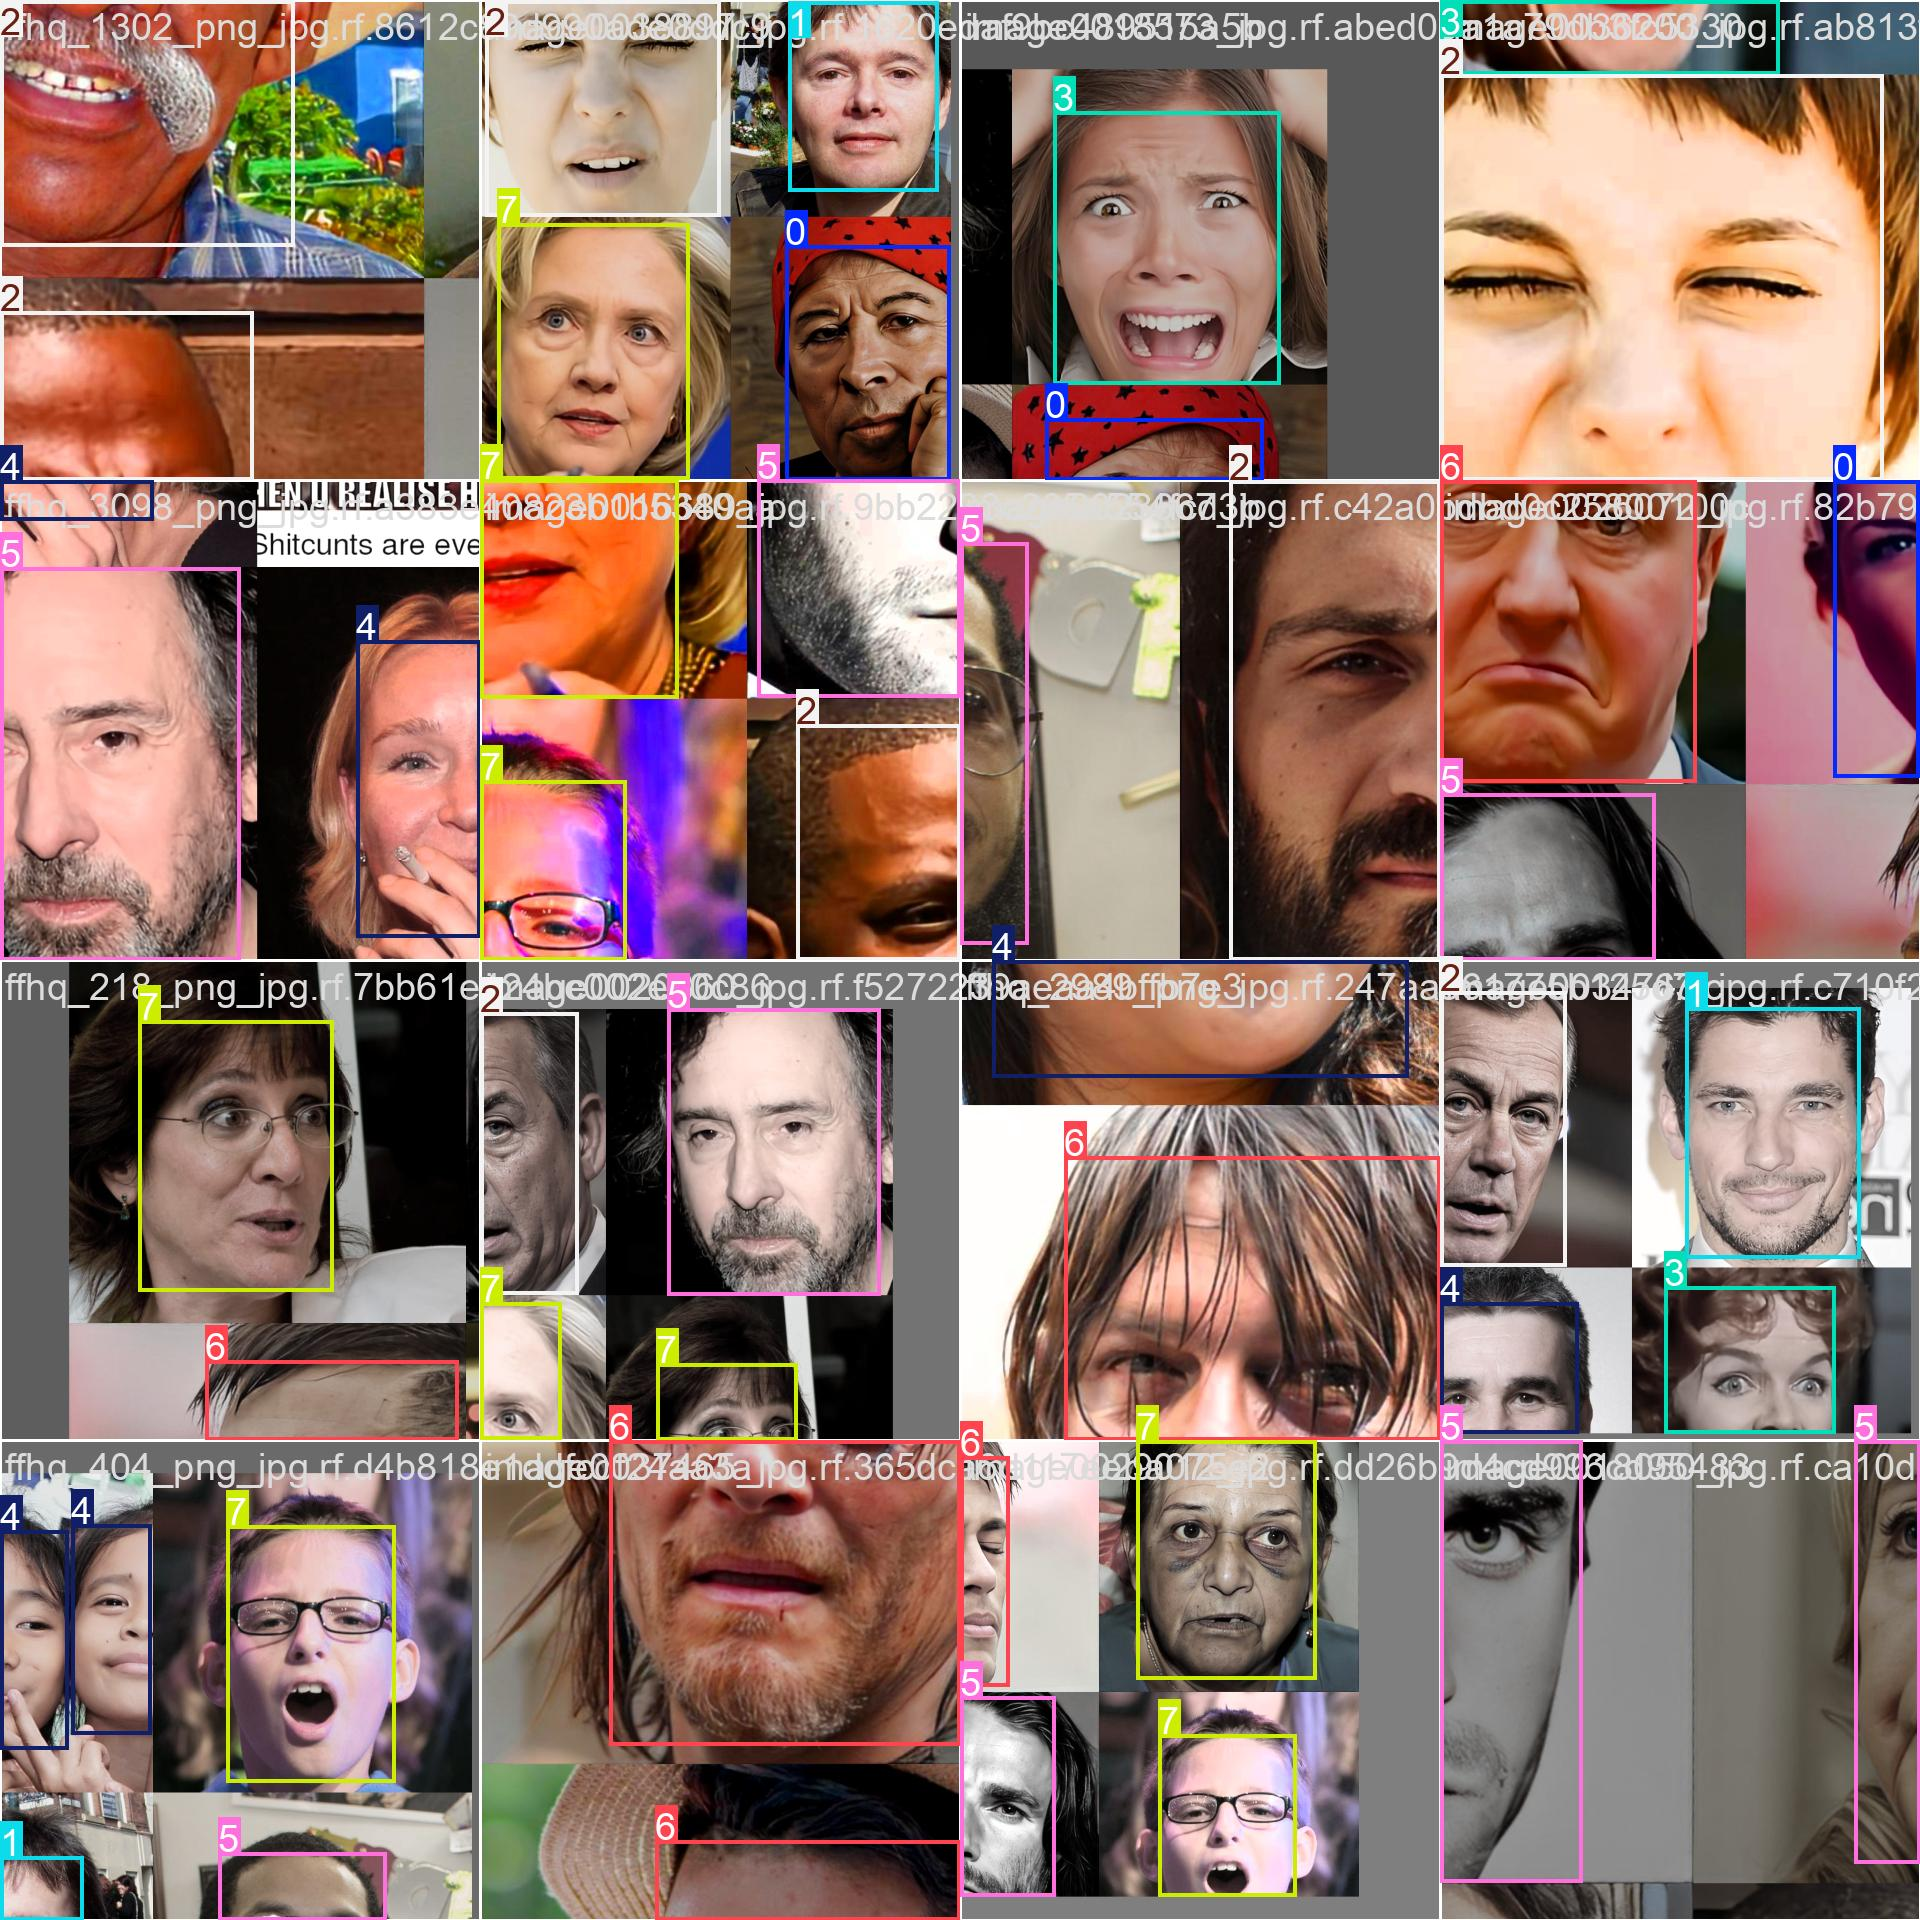

In [11]:
Image("/content/runs/detect/train/train_batch2.jpg",width=600)

In [12]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Human-face-emotions-30/valid/labels.cache... 1873 images, 0 backgrounds, 0 corrupt: 100% 1873/1873 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 118/118 [00:36<00:00,  3.26it/s]
                   all       1873       1903      0.642       0.75      0.767      0.688
                 anger        235        239      0.606       0.69      0.715      0.619
               content        237        240      0.693      0.787      0.829      0.752
               disgust        254        256      0.654      0.679      0.739      0.654
                  fear        214        215       0.66      0.769      0.803      0.709
                 happy        208        219      0.716      0.858      0.883      0.822
               neutral        246

In [13]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

image 1/941 /content/Human-face-emotions-30/test/images/ffhq_1023_png_jpg.rf.773445fdeb82226802837a6f470c2a27.jpg: 1024x1024 1 content, 1 happy, 14.0ms
image 2/941 /content/Human-face-emotions-30/test/images/ffhq_1025_png_jpg.rf.56f7797baa7bd6caa89c3a269cd17afb.jpg: 1024x1024 1 happy, 14.1ms
image 3/941 /content/Human-face-emotions-30/test/images/ffhq_1043_png_jpg.rf.8681630b812cc7b9c88f469eed896107.jpg: 1024x1024 1 neutral, 14.0ms
image 4/941 /content/Human-face-emotions-30/test/images/ffhq_1047_png_jpg.rf.74278e14f25c90187060b939fc1bda1c.jpg: 1024x1024 1 neutral, 14.0ms
image 5/941 /content/Human-face-emotions-30/test/images/ffhq_1059_png_jpg.rf.d002e05edfa8b4eba78e1198feacb16f.jpg: 1024x1024 1 neutral, 14.0ms
image 6/941 /content/Human-face-emotions-30/test/images/ffhq_1063_png_jpg.rf.3c2b0d0532c17d89ffe043c65e03ebfc.j

In [1]:
import glob
import os
from IPython.display import Image as IPyImage,display
new_folder = max(glob.glob('/content/runs/detect/predict*/'),key=os.path.getmtime)
for img in glob.glob(f'{new_folder}/*.jpg')[1:4]:
  display(IPyImage(filename=img,width=600))
  print("\n")

ValueError: max() arg is an empty sequence